# Assignment 2

Please read the following instructions carefully:

This assignment will test your knowledge of machine learning, data visualisation, and computer vision techniques in Python. This will primarily focus on scikit-learn, seaborn/matplotlib and skimage/opencv, and how to program using these packages and as such you should use the appropriate functionality provided by the packages. You may also use Numpy, panda, etc. where appropriate for some questions. Do not use any other external packages other than these.

In the below questions you will generally need to complete the code in the cell below the question and output the required results, charts or graphs.

Questions 1-5 are each worth 5 marks.

#### 1. Load/download and normalize the FashionMNIST training and test datasets using the instructions shown here: https://github.com/zalandoresearch/fashion-mnist#usage.
#### Please download both the training and testing sets, and load the training images, training labels, testing images, and testing labels as 'x_train', 'y_train', 'x_test', and 'y_test, correspondingly.
    
#### And show some training images by visualising a few images from the training set.

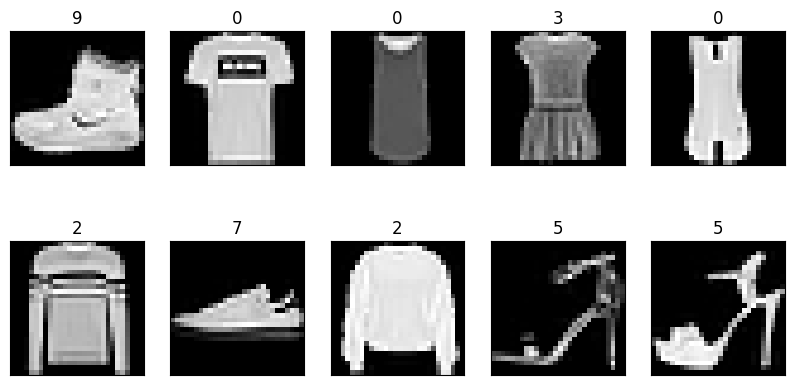

In [6]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

#loading dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizing the datasets
x_train = x_train / 255.0
x_test = x_test / 255.0

# Plotting some training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
plt.show()

#### 2. Please show 5 images from the training set in a row (similar to what you have done above), but this time also show the corresponding category name (e.g. T-shirt, Dress, Bag, etc., detailed definition of the categories is list on the dataset link above) on top of each image as its title.



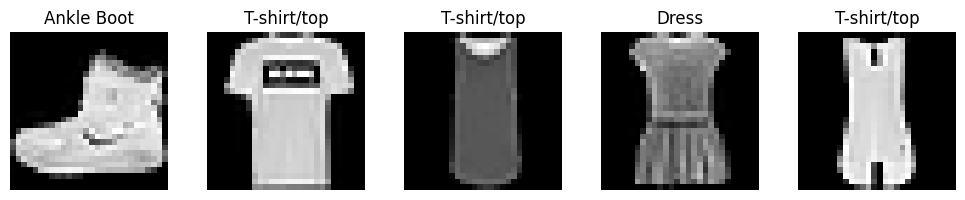

In [7]:
#defining labels
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

#plotting 5 images from training set
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(labels[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

#### 3. Apply a support vector classifier on the above (training) data. And use the learned/trained classifier to predict the category value on the test set.
#### The parameters to be used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default.

#### If you find the training over the whole training set takes too much time (e.g. > 10 minutes), you may only use the first 10,000 samples of the training set instead.

#### Please also show 5 examples from the test set, with the title being "predicted category name (ground-truth category name)", e.g. "Shirt (Shirt)".

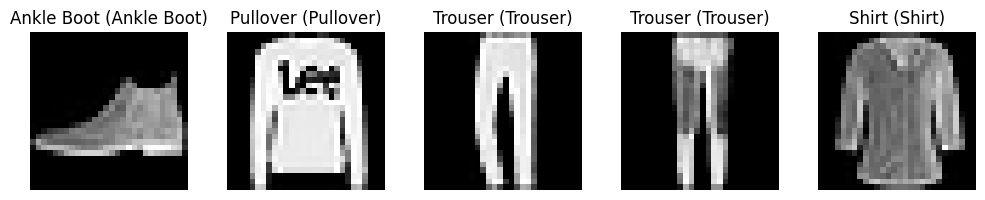

Accuracy of the SVM classifier: 83.87%
 SVC Classification report for 10000 samples:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.88      0.86      1000
           4       0.74      0.76      0.75      1000
           5       0.93      0.91      0.92      1000
           6       0.61      0.56      0.58      1000
           7       0.89      0.92      0.90      1000
           8       0.94      0.95      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [8]:
from sklearn.svm import SVC  # Importing Support Vector Classifier
from tensorflow.keras.datasets import fashion_mnist

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  # Loading Fashion MNIST data

# Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Create and train the support vector classifier
svm_classifier = SVC(kernel='linear', C=0.025)

# Using the first 10,000 samples
svm_classifier.fit(x_train[:10000], y_train[:10000])

# Using the trained classifier to predict the category value on the test set
y_pred = svm_classifier.predict(x_test)

# Plotting 5 examples from the test set with predicted and ground-truth category names
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"{labels[y_pred[i]]} ({labels[y_test[i]]})")
    plt.axis('off')
plt.tight_layout()
plt.show()

#  Accuracy of the classifier
from sklearn.metrics import accuracy_score  # Importing the accuracy_score function
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy * 100}%")


# Print the SVC classification report
from sklearn.metrics import classification_report
print(" SVC Classification report for 10000 samples:")
print(classification_report(y_test,y_pred))

#### 4. Similar to above, but use a neural network (i.e. MLP classifier) for the classification task, and training it for 1000 maximum numebr of iterations, with the L2 penalty of 1.
#### First use the same 10,000 training samples, then change the number of training samples to the whole training set. Think about the difference between this classifier and the above SVM classifier.

#### Please also show 5 samples from the test set (same as above), and also print the text report of the main classification metrics. Think about how does it differ from the results in the above SVM classification model (i.e. you need to print out the classification metrics for the above SVM model to compare).

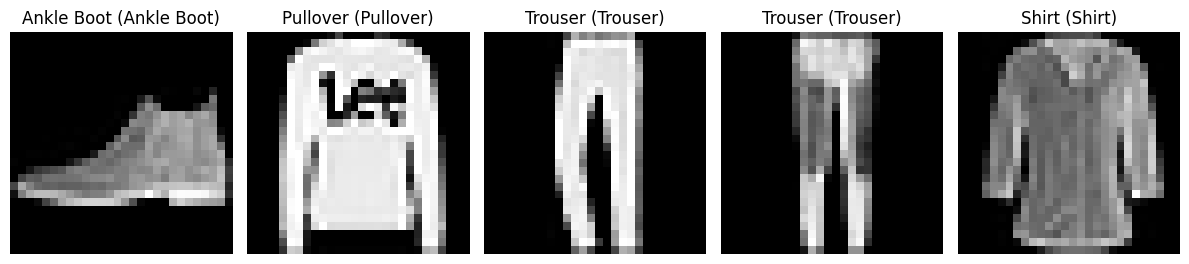

Classification report using 10000 samples:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.79      0.68      0.73      1000
           3       0.87      0.85      0.86      1000
           4       0.74      0.79      0.76      1000
           5       0.94      0.89      0.92      1000
           6       0.57      0.69      0.63      1000
           7       0.91      0.90      0.90      1000
           8       0.95      0.93      0.94      1000
           9       0.89      0.96      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

Classification report using entire dataset:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.99      0.94      0.96  

In [9]:
from sklearn.neural_network import MLPClassifier #Importing MLP Classifier
from sklearn.metrics import classification_report

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  # Loading Fashion MNIST data

# Flattening images
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Using first 10,000 training samples
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x_train[:10000], y_train[:10000])

# Predict on the test set
mlp_y_pred = mlp.predict(x_test)

# Using the entire training set
mlp_whole = MLPClassifier(alpha=1, max_iter=1000)
mlp_whole.fit(x_train, y_train)

# Predict on the test set
mlp_whole_y_pred = mlp_whole.predict(x_test)

# Plotting the images with predicted and ground-truth labels
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"{labels[mlp_whole_y_pred[i]]} ({labels[y_test[i]]})")
    plt.axis('off')
    plt.tight_layout()
plt.show()

# Print the classification report
print("Classification report using 10000 samples:")
print(classification_report(y_test, mlp_y_pred))


# Print the classification report
print("Classification report using entire dataset:")
print(classification_report(y_test, mlp_whole_y_pred))

#### 5. Please apply a Sobel edge detector on the above dataset images (both training and testing), then train the same MLP classifier as above (on the whole new trianing set), show the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reprot the main classification matrics.

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above. Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

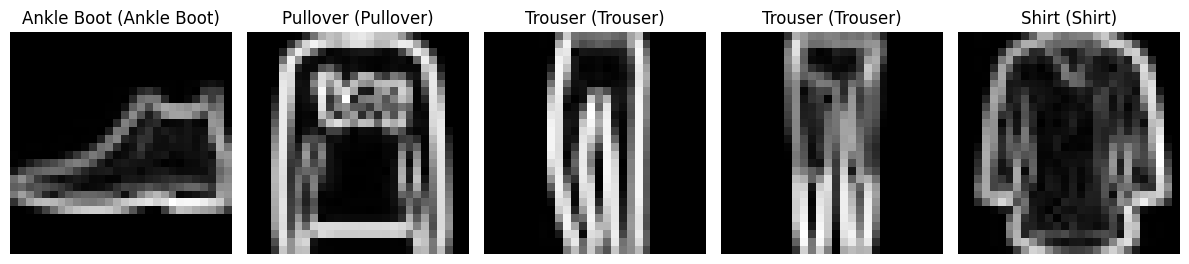

Classification report using entire dataset:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.96      0.95      0.96      1000
           2       0.79      0.71      0.75      1000
           3       0.82      0.87      0.85      1000
           4       0.74      0.79      0.77      1000
           5       0.93      0.92      0.93      1000
           6       0.62      0.61      0.62      1000
           7       0.90      0.91      0.90      1000
           8       0.94      0.94      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [10]:
from skimage import filters
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Applying the Sobel filter to the training and testing data
x_train_sobel = np.array([filters.sobel(image) for image in x_train])
x_test_sobel = np.array([filters.sobel(image) for image in x_test])

# Flattening the images back to 1D vectors
x_train_sobel = x_train_sobel.reshape(-1, 28*28)
x_test_sobel = x_test_sobel.reshape(-1, 28*28)

# Training the MLP classifier
mlp = MLPClassifier(max_iter=1000, alpha=1)
mlp.fit(x_train_sobel, y_train)

# Predicting on the test set
mlp_sobel_y_pred = mlp.predict(x_test_sobel)

# Plotting 5 images
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.grid(False)
    plt.imshow(x_test_sobel[i].reshape(28, 28), cmap='gray')
    plt.title(f"{labels[mlp_sobel_y_pred[i]]} ({labels[y_test[i]]})")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Reporting the main classification metrics
print("Classification report using entire dataset:")
print(classification_report(y_test, mlp_sobel_y_pred))

In [11]:
pip install opencv-python

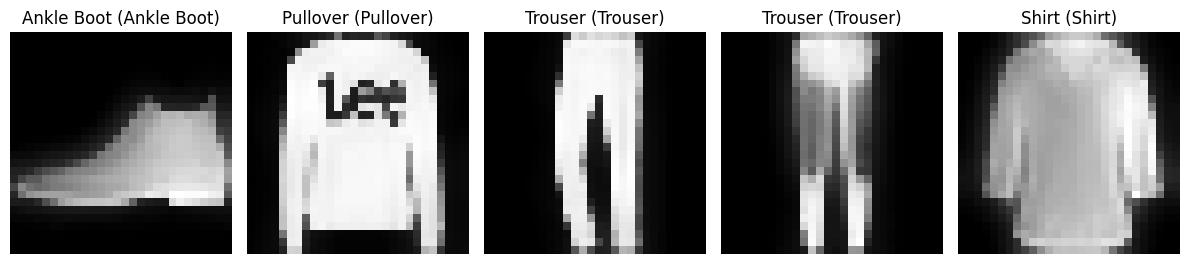

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.96      0.95      0.96      1000
           2       0.77      0.72      0.75      1000
           3       0.83      0.85      0.84      1000
           4       0.72      0.80      0.76      1000
           5       0.92      0.91      0.91      1000
           6       0.65      0.55      0.60      1000
           7       0.90      0.91      0.90      1000
           8       0.93      0.96      0.94      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [14]:
import cv2
# Defining a bilateral filter function
def bilateral_filter(data):
    new_data = np.array([cv2.bilateralFilter(img, 9, 85, 85) for img in data])
    return new_data

# Applying the bilateral filter on training and testing set
x_train_filtered = bilateral_filter(x_train)
x_test_filtered = bilateral_filter(x_test)

# Flattening and normalizing
x_train_ft = x_train_filtered.reshape(x_train_filtered.shape[0], -1) / 255.0
x_test_ft = x_test_filtered.reshape(x_test_filtered.shape[0], -1) / 255.0

# Training the MLP classifier
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x_train_ft, y_train)

# Predicting on the test set
mlp_bi_y_pred = mlp.predict(x_test_ft)

plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.grid(False)
    plt.imshow(x_test_filtered[i].reshape(28, 28), cmap='gray')
    plt.title(f"{labels[mlp_bi_y_pred[i]]} ({labels[y_test[i]]})")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Reporting metrics
print("Classification Report:")
print(classification_report(y_test, mlp_bi_y_pred))